In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def floodFillPostProcess(src,diff=(2,2,2)):
    img=src.copy()
    rows,cols=img.shape[:2]
    mask=np.zeros(shape=(rows+2,cols+2),dtype=np.uint8)
    for y in range(rows):
        for x in range(cols):
            if mask[y+1,x+1]==0:
                r=np.random.randint(256)
                g=np.random.randint(256)
                b=np.random.randint(256)
                cv2.floodFill(img,mask,(x,y),(b,g,r),diff,diff)
    return img

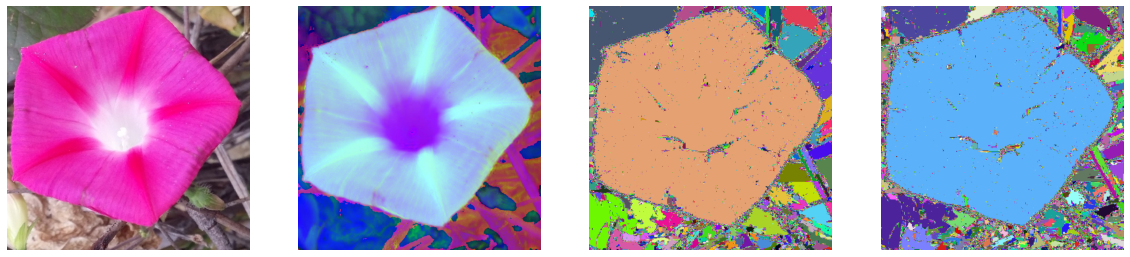

In [13]:
src=cv2.imread('./data/flower.jpg')
srcrgb=cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
dst=floodFillPostProcess(src,diff=(5,5,5))
dst2=floodFillPostProcess(hsv,diff=(5,5,5))

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(srcrgb)

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(hsv)

plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(dst)

plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(dst2)

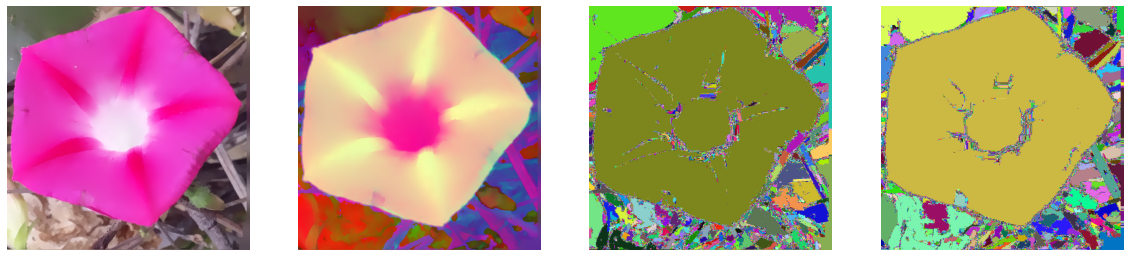

In [17]:
res=cv2.pyrMeanShiftFiltering(src,sp=5,sr=20,maxLevel=4)
resrgb=cv2.cvtColor(res,cv2.COLOR_BGR2RGB)
dst3=floodFillPostProcess(res)

term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,2)
res2=cv2.pyrMeanShiftFiltering(hsv,sp=5,sr=20,maxLevel=4,termcrit=term_crit)
res2rgb=cv2.cvtColor(res2,cv2.COLOR_BGR2RGB)
dst4=floodFillPostProcess(res2)

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.axis('off')
plt.imshow(resrgb)

plt.subplot(1,4,2)
plt.axis('off')
plt.imshow(res2rgb)

plt.subplot(1,4,3)
plt.axis('off')
plt.imshow(dst3)

plt.subplot(1,4,4)
plt.axis('off')
plt.imshow(dst4)